<a href="https://colab.research.google.com/github/RebecaJmz/DIPLOMADO_CIENCIA_DE_DATOS/blob/main/002_TAREAS/005_An%C3%A1lisis_Exploratorio/015_T_An%C3%A1lisis_exploratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

JUEVES 25 DE MAYO DE 2023

# **ANÁLISIS EXPLORATORIO SOBRE LA RENTA DE DIFERENTES TIPOS DE INMUEBLES EN PERÚ**

# INFORMACIÓN DE LA BASE DE DATOS

La base de datos analizada se trata de un conjunto de 32,960 datos referentes a diferentes tipos de inmuebles en Perú. Consta de 9 variables de las cuales tenemos 7 cuantitativas (cuartos, vacantes, suites, área, valor, mantenimiento e impuesto) y dos cualitativas (tipo y distrito)



 1.   **Tipo:** Naturaleza del inmueble
 2.   **Distrito:** Lugar donde se localiza
 3.   **Cuartos:** Cantidad total de habitaciones
 4.   **Vacantes:** Dantidad de habitaciones disponibles
 5.   **Suites:** Cantidad de habitaciones (Lujo)
 6.   **Área:**  Terreno ocupado por el inmueble en m^2
 7.   **Valor:** Monto de la renta mensual en USD
 8.   **Mantenimiento**: Cuota a pagar por dicho concepto
 9.   **Impuesto:** Monto del ISR



# TRATAMIENTO DE LA BASE DE DATOS

In [ ]:
#Importar librería pandas

import pandas as pd

In [ ]:
#Cargar base de datos dentro del notebook

renta = pd.read_csv('alquiler.csv', sep=';')

In [ ]:
#Desgloce de la información contenida en el archivo

renta

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Local comercial,Ate,0,4,0,150,5200.0,4020.0,1111.0
3,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
4,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0
32956,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0
32957,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0
32958,Departamento,Rímac,2,0,0,70,3000.0,760.0,NaN


In [ ]:
#Resumen de la base

renta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           32960 non-null  object 
 1   Distrito       32960 non-null  object 
 2   Cuartos        32960 non-null  int64  
 3   Vacantes       32960 non-null  int64  
 4   Suites         32960 non-null  int64  
 5   Area           32960 non-null  int64  
 6   Valor          32943 non-null  float64
 7   Mantenimiento  28867 non-null  float64
 8   Impuesto       22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [ ]:
#Estadísticos de la base

renta.describe()

,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


# LIMPIEZA Y MANIPULACIÓN DE LA BASE DE DATOS

ELIMINAR VALORES DUPLICADOS

In [ ]:
tinmueble= renta.Tipo

In [ ]:
type(tinmueble)

pandas.core.series.Series

In [ ]:
tinmueble.drop_duplicates(inplace=True) #Valores únicos en la variable inmuebles

In [ ]:
tinmueble

0                        Habitación
1                              Casa
2                   Local comercial
3                      Departamento
7                Casa en condominio
16                Edificio completo
17                             Flat
29                     Tienda/Salón
80                          Almacén
83                   Casa comercial
117                   Casa de villa
159                         Terreno
207                         Cochera
347                            Loft
589      Tienda en Centro Comercial
2157                         Chacra
3354          Terreno em condominio
4379                        Oficina
4721                         Chalet
6983                         Studio
9687                          Hotel
23614              Local industrial
Name: Tipo, dtype: object

Filtrado de datos

In [ ]:
list(renta['Tipo'].drop_duplicates())

['Habitación',
 'Casa',
 'Local comercial',
 'Departamento',
 'Casa en condominio',
 'Edificio completo',
 'Flat',
 'Tienda/Salón',
 'Almacén',
 'Casa comercial',
 'Casa de villa',
 'Terreno',
 'Cochera',
 'Loft',
 'Tienda en Centro Comercial',
 'Chacra',
 'Terreno em condominio',
 'Oficina',
 'Chalet',
 'Studio',
 'Hotel',
 'Local industrial']

In [ ]:
residencial = ['Habitación',
 'Casa',
 'Departamento',
 'Casa en condominio',
 'Casa comercial',
 'Casa de villa',]

FILTRADO INMUEBLES CONSIDERADOS COMO RESIDENCIALES

In [ ]:
seleccion = renta['Tipo'].isin(residencial)
seleccion

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [ ]:
iresidencial = renta[seleccion]

In [ ]:
iresidencial

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
3,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
4,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
5,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0
32955,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0
32956,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0
32957,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0


In [ ]:
iresidencial.shape[0] #Tamaño de la base de datos

22845

In [ ]:
iresidencial.index=range(iresidencial.shape[0]) #Cambiar los indíces de la nueva base de datos
iresidencial

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
4,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22840,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0
22841,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0
22842,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0
22843,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0


SELECCIONES Y FRECUENCIAS

Selección de los inmuebles clasificados como departamentos

In [ ]:
seleccion = iresidencial['Tipo'] == 'Departamento'
s1 = iresidencial[seleccion].shape[0]
s1

19532

Selección de los inmuebles clasificados como tipos de casas

In [ ]:
seleccion = (iresidencial['Tipo'] == 'Casa')|(iresidencial['Tipo'] == 'Casa en condominio')|(iresidencial['Tipo'] == 'Casa de villa')
s2 = iresidencial[seleccion].shape[0]
s2

2212

Selección de los inmuebles con área entre 60 y 100 metros cuadrados

In [ ]:
seleccion = (iresidencial['Area']>=60)&(iresidencial['Area']<=100)
s3 = iresidencial[seleccion].shape[0]
s3

8736

Selección de los inmuebles que tengan por lo menos 4 cuartos y un alquiler menor que $2,000.00

In [ ]:
seleccion = (iresidencial['Cuartos']>=4)&(iresidencial['Valor']<=2000)
s4 = iresidencial[seleccion].shape[0]
s4

60

MANEJO DE DATOS FALTANTES

In [ ]:
iresidencial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22845 entries, 0 to 22844
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           22845 non-null  object 
 1   Distrito       22845 non-null  object 
 2   Cuartos        22845 non-null  int64  
 3   Vacantes       22845 non-null  int64  
 4   Suites         22845 non-null  int64  
 5   Area           22845 non-null  int64  
 6   Valor          22836 non-null  float64
 7   Mantenimiento  20796 non-null  float64
 8   Impuesto       15976 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


VALORES NULOS DE LA COLUMNA VALOR

In [ ]:
iresidencial[iresidencial['Valor'].isnull()] #Extraer las líneas con los valores nulos

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
58,Departamento,Ate,2,1,1,70,NaN,970.0,68.0
1515,Departamento,San Bartolo,2,0,0,75,NaN,878.0,NaN
1708,Casa,Lince,3,4,3,363,NaN,NaN,NaN
2039,Departamento,Chorrillos,2,0,0,95,NaN,1010.0,170.0
2061,Departamento,San Borja,2,0,0,72,NaN,850.0,NaN
4998,Casa,Lince,3,2,1,100,NaN,NaN,NaN
8674,Departamento,San Bartolo,2,0,1,75,NaN,878.0,NaN
9061,Departamento,La Punta,3,0,1,135,NaN,910.0,228.0
9264,Departamento,La Perla,3,1,1,105,NaN,880.0,221.0


In [ ]:
#Eliminar los NaN de la columna Valor
A = iresidencial.shape[0]
iresidencial.dropna(subset = ['Valor'], inplace = True)
B =iresidencial.shape[0]
A-B

<ipython-input-26-c4390ad81924>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iresidencial.dropna(subset = ['Valor'], inplace = True)


9

VALORES NULOS DE LA COLUMNA MANTENIMIENTO E IMPUESTO

In [ ]:
seleccion = (iresidencial['Mantenimiento'].isnull()) & (iresidencial['Tipo']=='Departamento')

In [ ]:
#Eliminar los NaN de la columna Valor
A = iresidencial.shape[0]
renta = iresidencial[~seleccion]
B =renta.shape[0]
A-B

745

In [ ]:
renta[renta['Mantenimiento'].isnull()].shape[0]

1302

In [ ]:
renta = renta.fillna({'Mantenimiento':0, 'Impuesto':0})

In [ ]:
renta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22091 entries, 0 to 22844
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           22091 non-null  object 
 1   Distrito       22091 non-null  object 
 2   Cuartos        22091 non-null  int64  
 3   Vacantes       22091 non-null  int64  
 4   Suites         22091 non-null  int64  
 5   Area           22091 non-null  int64  
 6   Valor          22091 non-null  float64
 7   Mantenimiento  22091 non-null  float64
 8   Impuesto       22091 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


CREANDO NUEVAS VARIABLES EN LA BASE DE DATOS

Agregaremos una columna con el valor bruto de los inmuebles

In [ ]:
renta['Valor Bruto'] = (renta['Valor']) + (renta['Mantenimiento']) + (renta['Impuesto'])
renta

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor Bruto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,1210.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,1030.0
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,1618.0
...,...,...,...,...,...,...,...,...,...,...
22840,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0,1438.0
22841,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0,1175.0
22842,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0,2640.0
22843,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0,1946.0


Calculando el valor bruto por metro cuadrado

In [ ]:
renta['Valor m2'] = (renta['Valor']/renta['Area']).round(2)
renta

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor Bruto,Valor m2
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00
...,...,...,...,...,...,...,...,...,...,...,...
22840,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0,1438.0,12.86
22841,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0,1175.0,29.63
22842,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08
22843,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17


In [ ]:
renta['Valor Bruto m2'] = ((renta['Valor Bruto']/renta['Area'])).round(2)
renta

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor Bruto,Valor m2,Valor Bruto m2
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36
...,...,...,...,...,...,...,...,...,...,...,...,...
22840,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0,1438.0,12.86,20.54
22841,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0,1175.0,29.63,43.52
22842,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08,33.85
22843,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17,40.54


SEPARANDO INMUEBLES POR DISTRITO

In [ ]:
gdistrito = renta.groupby('Distrito')

OBTENIENDO ESTADISTICAS DESCRIPTIVAS

In [ ]:
gdistrito['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Distrito,,,,,,,,
Ancón,93.0,3816.34,5363.42,400.0,900.0,1700.0,4900.0,38000.0
Ate,3960.0,6960.98,11806.44,560.0,2500.0,4300.0,8500.0,600000.0
Barranco,47.0,1403.83,1496.62,450.0,800.0,1100.0,1200.0,8000.0
Bellavista,43.0,972.56,495.64,400.0,700.0,850.0,1100.0,3600.0
Breña,176.0,4099.12,3468.09,790.0,2400.0,3000.0,4000.0,22000.0
Callao,483.0,4915.28,44046.80,500.0,1200.0,1700.0,2250.0,800000.0
Carabayllo,43.0,1461.86,1033.67,480.0,900.0,1200.0,1800.0,6000.0
Carmen de La Legua,30.0,2523.67,5820.90,485.0,525.0,1000.0,1675.0,30000.0
Chaclacayo,135.0,1428.07,715.11,400.0,1000.0,1200.0,1650.0,4500.0


In [ ]:
gdistrito['Valor'].mean().round(2)

Distrito
Ancón                      3816.34
Ate                        6960.98
Barranco                   1403.83
Bellavista                  972.56
Breña                      4099.12
Callao                     4915.28
Carabayllo                 1461.86
Carmen de La Legua         2523.67
Chaclacayo                 1428.07
Chorrillos                 8604.04
Cieneguilla                1044.64
Comas                      8823.80
El Agustino                1152.67
Independencia               909.26
Jesús María                4001.75
La Molina                  1425.23
La Perla                   5918.41
La Punta                   2425.18
La Victoria                1141.74
Lima                       1310.00
Lince                      1736.10
Los Olivos                 1611.73
Lurigancho                 8852.13
Lurín                      2327.79
Magdalena del Mar          1886.54
Mi Perú                    1748.47
Miraflores                 5578.48
Pachacámac                 1485.57
Pucusana   

# VISUALIZACIÓN DE LOS DATOS

In [ ]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'VALOR PROMEDIO DE LA RENTA POR DISTRITO')

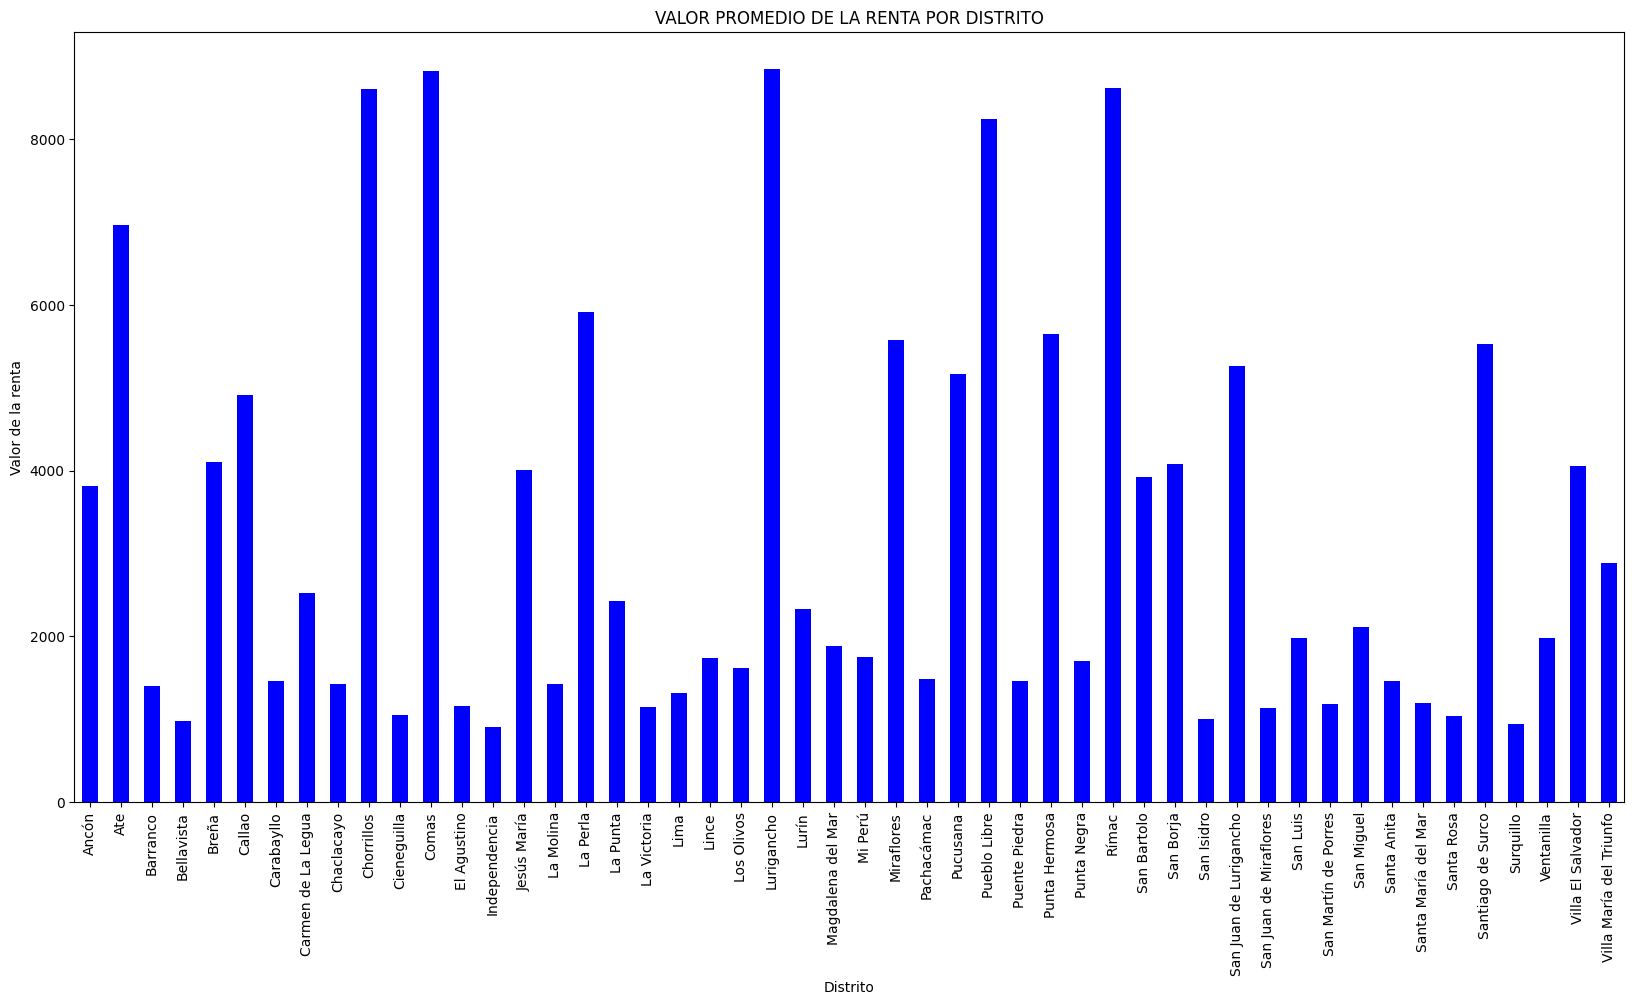

In [ ]:
fig = gdistrito['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor de la renta')
fig.set_title('VALOR PROMEDIO DE LA RENTA POR DISTRITO')

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

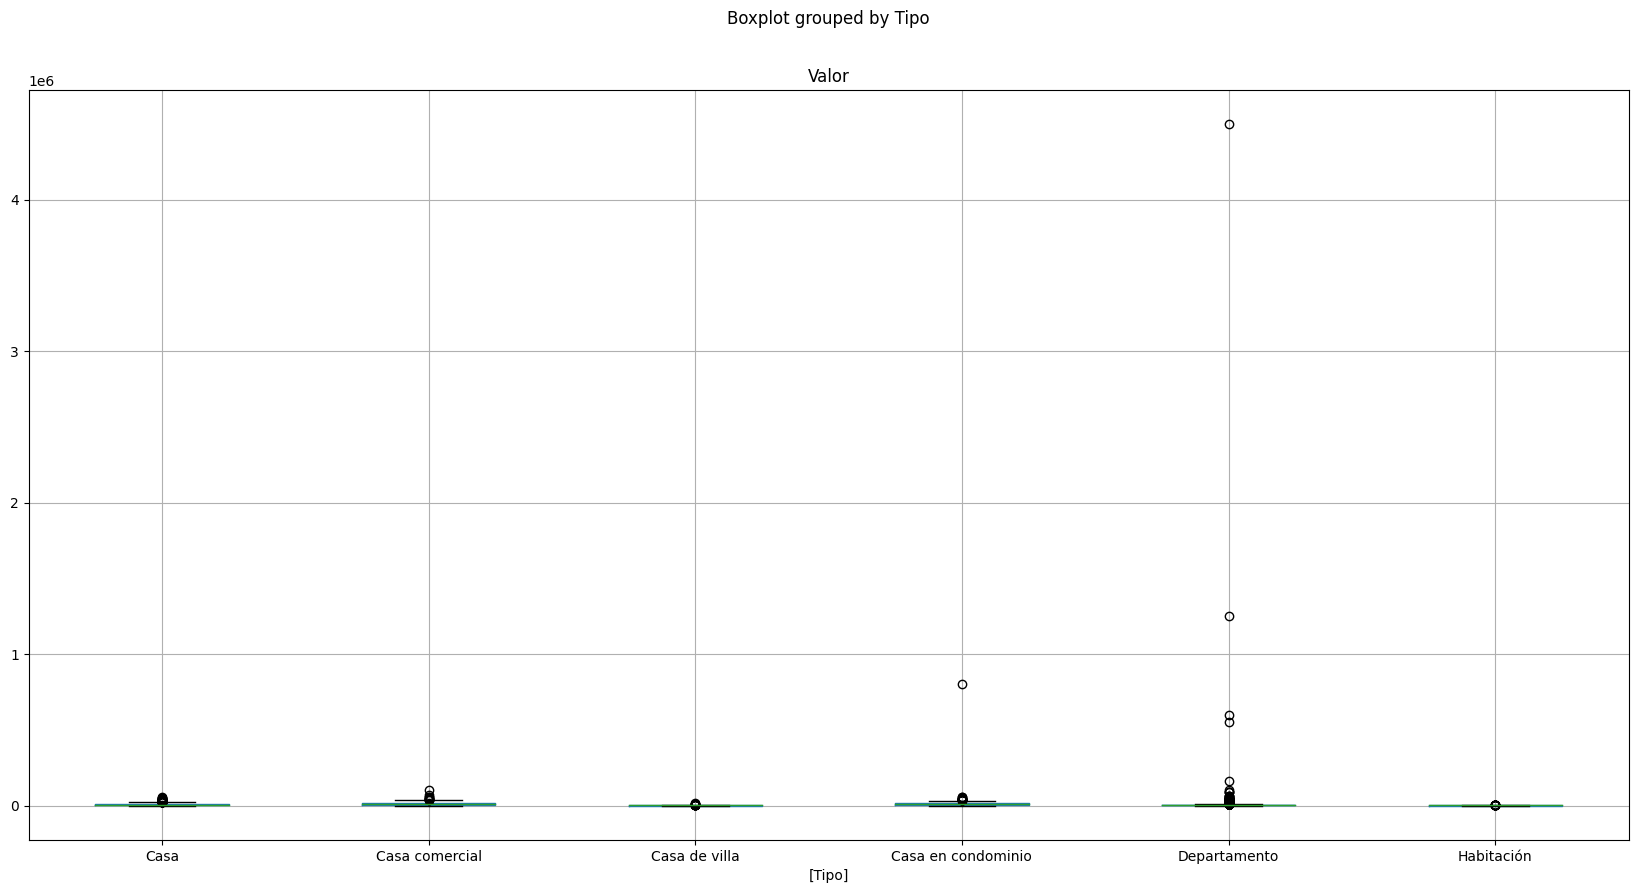

In [ ]:
renta.boxplot(['Valor'], by =['Tipo'])

Datos fuera de los $500,000 USD

In [ ]:
renta[renta['Valor'] >= 500000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor Bruto,Valor m2,Valor Bruto m2
7996,Departamento,Ate,1,1,0,65,600000.0,980.0,120.0,601100.0,9230.77,9247.69
11151,Casa en condominio,Callao,4,2,3,163,800000.0,900.0,0.0,800900.0,4907.98,4913.50
13260,Departamento,Callao,2,2,1,150,550000.0,850.0,150.0,551000.0,3666.67,3673.33
14502,Departamento,Jesús María,3,2,1,167,1250000.0,1186.0,320.0,1251506.0,7485.03,7494.05
16251,Departamento,Chorrillos,4,1,1,300,4500000.0,1100.0,0.0,4501100.0,15000.00,15003.67


Eliminando los valores fuera de Q1 - Q3

In [ ]:
valor = renta['Valor']

In [ ]:
Q1 = valor.quantile(0.25)
Q3 = valor.quantile(0.75)
RIQ = Q3 - Q1
LINF = Q1 - 1.5 *RIQ
LSUP = Q3 + 1.5*RIQ

In [ ]:
seleccion = ( valor >= LINF ) & (valor <= LSUP)

In [ ]:
renta2 = renta[seleccion]

BOXPLOT sin datos atípicos

HISTOGRAMA

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

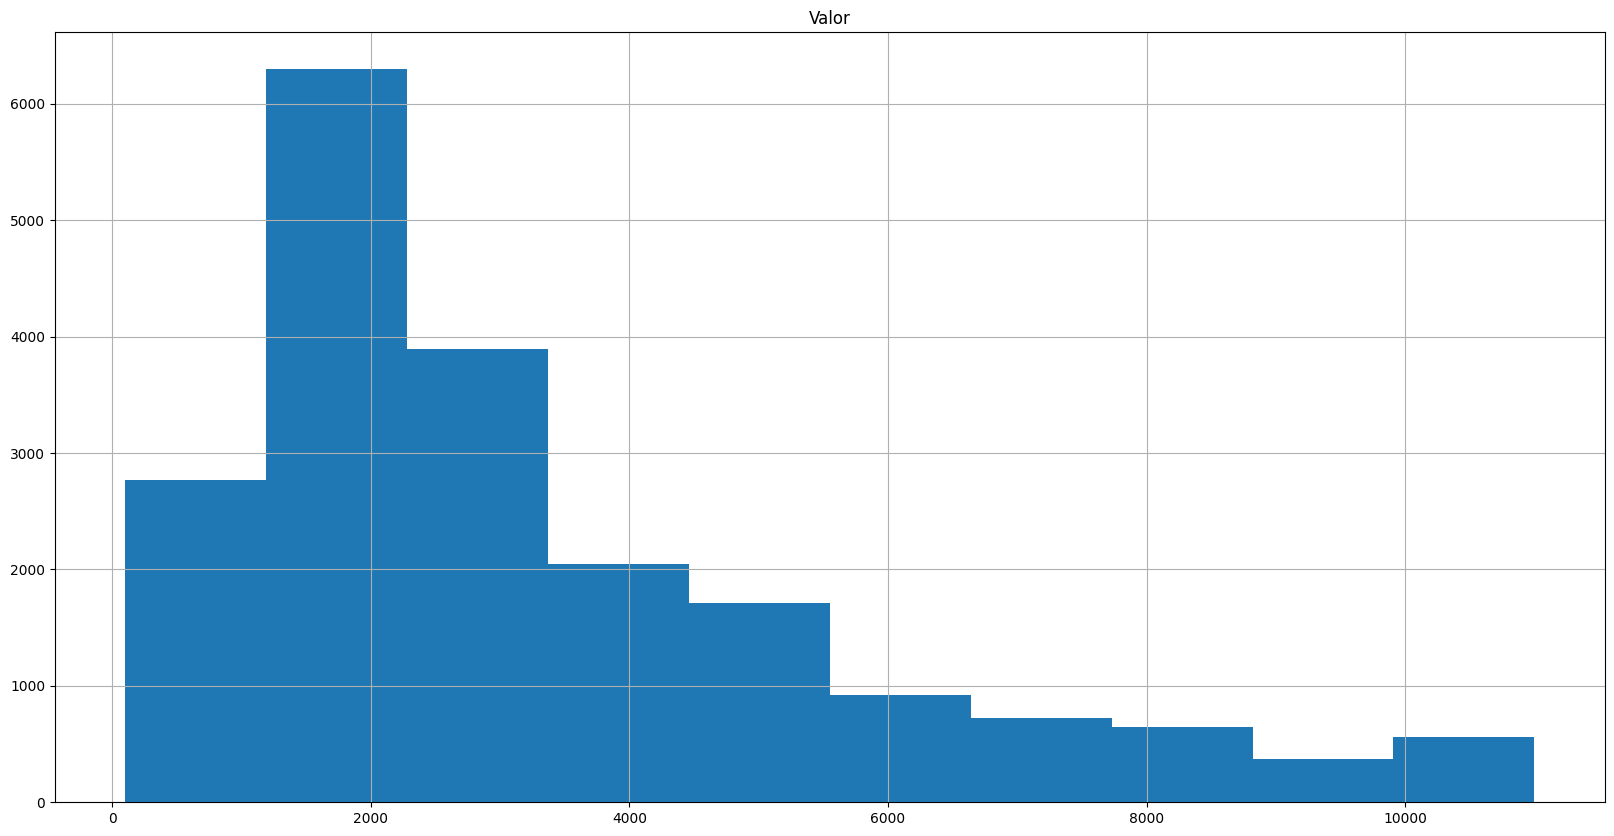

In [ ]:
renta2.hist(['Valor'])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

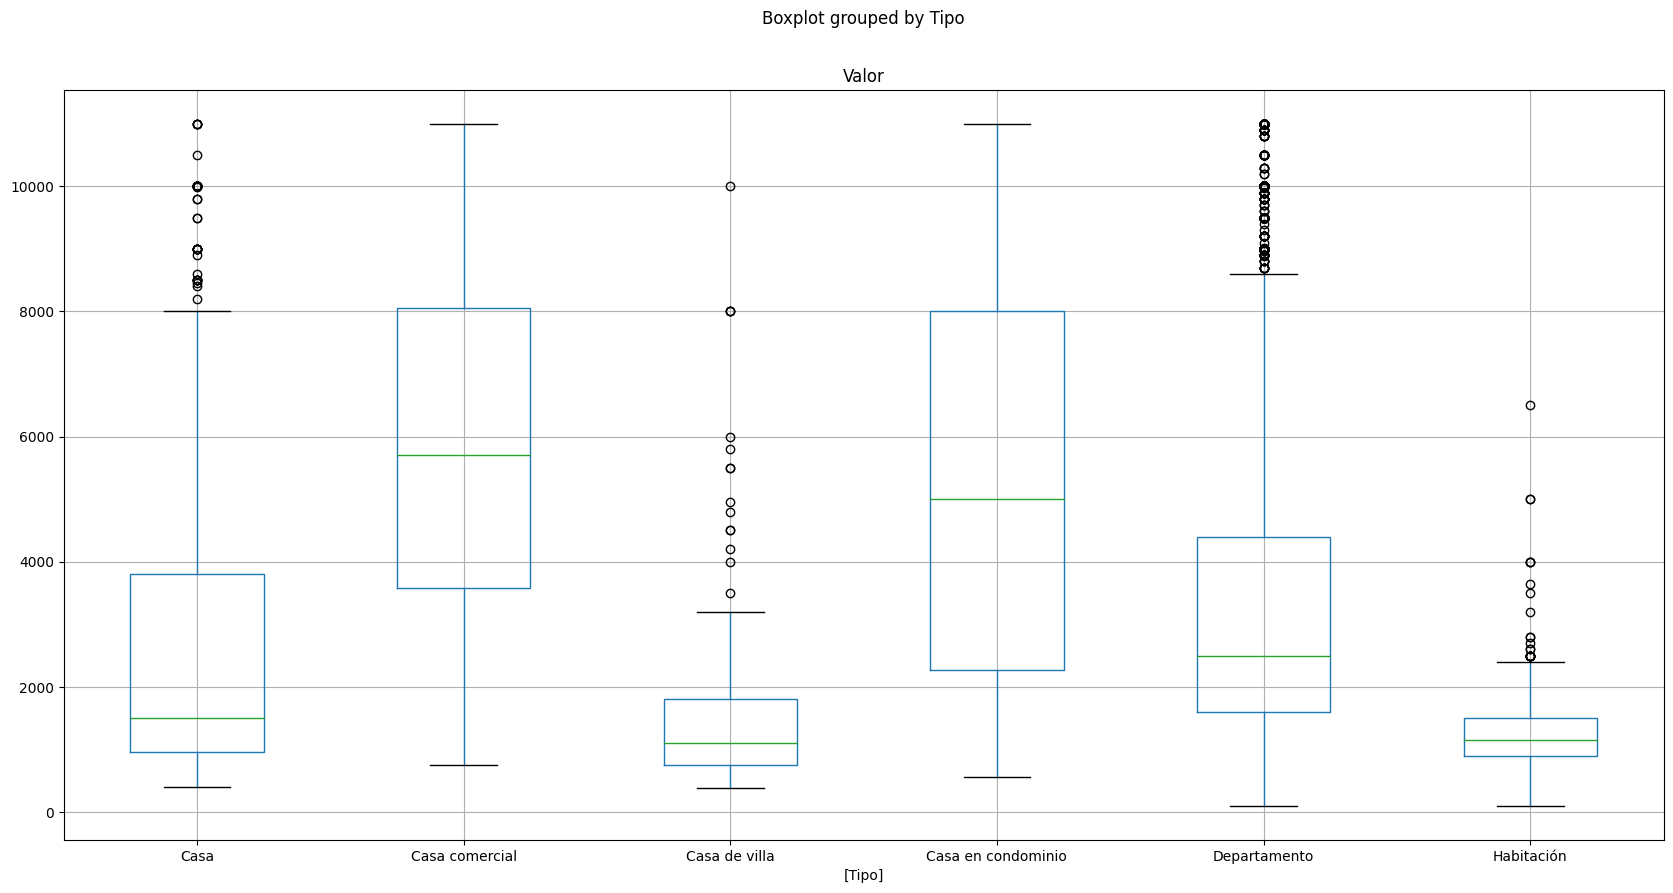

In [ ]:
renta2.boxplot(['Valor'], by = ['Tipo'])

OTROS GRAFICOS

In [ ]:
area = plt.figure()

<Figure size 2000x1000 with 0 Axes>

In [ ]:
g1 = area.add_subplot(2,2,1)
g2 = area.add_subplot(2,2,2)
g3 = area.add_subplot(2,2,3)
g4 = area.add_subplot(2,2,4)

DEFINIENDO CADA UNO DE LOS GRAFICOS

In [ ]:
g1.scatter(renta2.Valor, renta2.Area)
g1.set_title('VALOR POR AREA')

Text(0.5, 1.0, 'VALOR POR AREA')

In [ ]:
g2.hist(renta2.Valor)
g2.set_title('HISTOGRAMA')

Text(0.5, 1.0, 'HISTOGRAMA')

In [ ]:
renta2_g3 = renta2.Valor.sample(100)
renta2_g3.index = range(renta2_g3.shape[0])
g3.plot(renta2_g3)
g3.set_title('MUESTRA (VALOR)')

Text(0.5, 1.0, 'MUESTRA (VALOR)')

In [ ]:
grupo = renta2.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('VALOR MEDIO POR TIPO')

Text(0.5, 1.0, 'VALOR MEDIO POR TIPO')

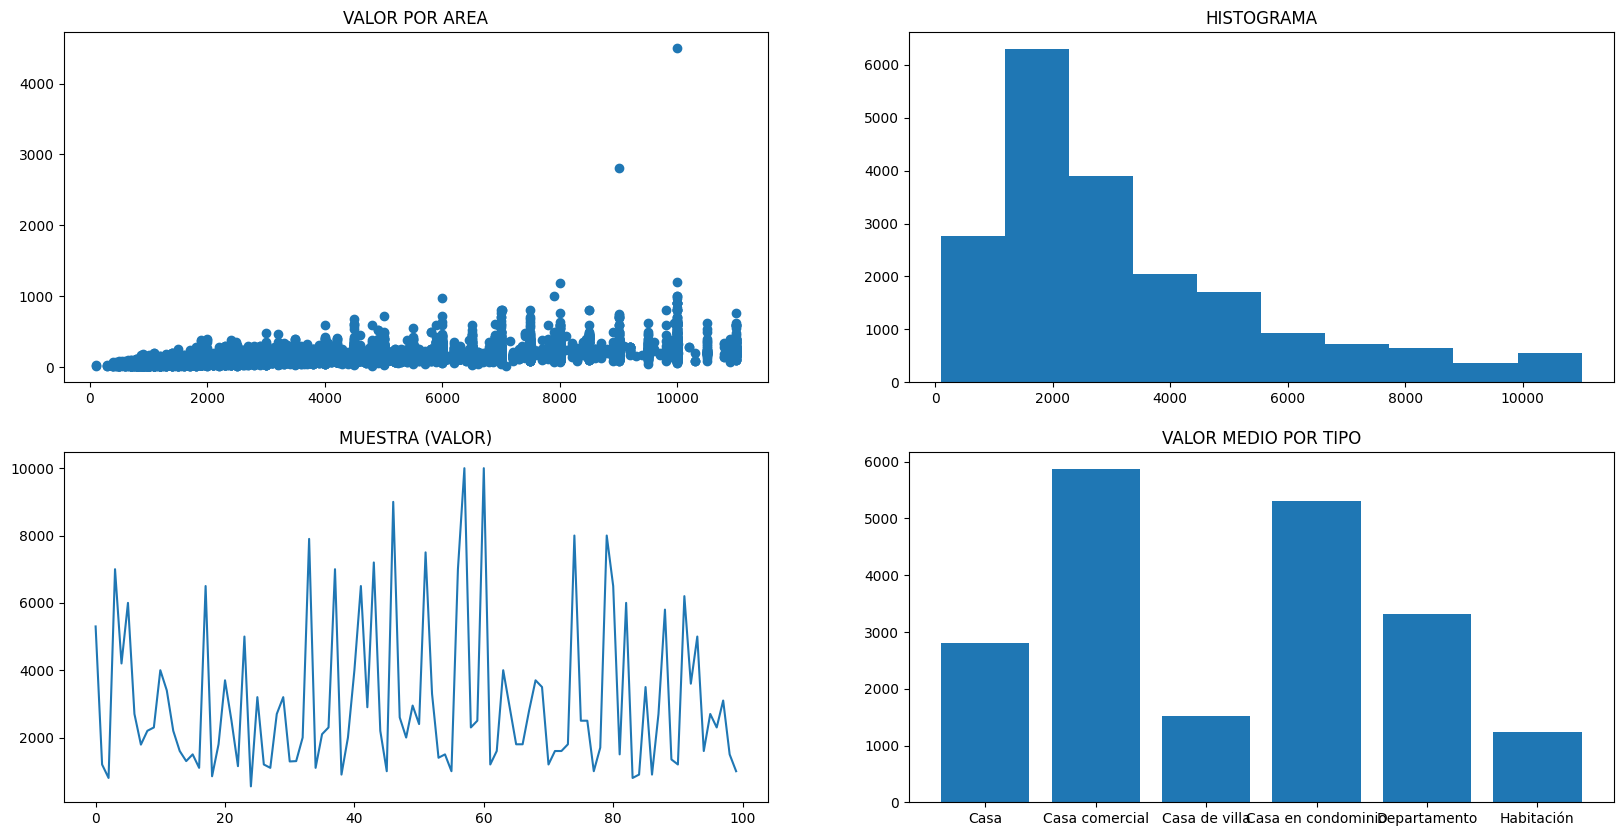

In [ ]:
area